/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks


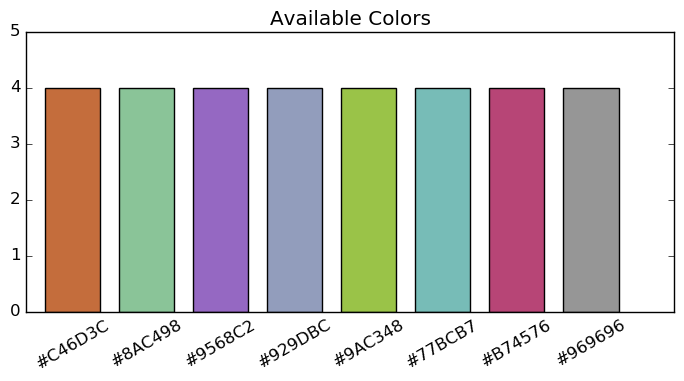

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib
import pylab
from os import listdir
from os.path import isfile, join
from collections import OrderedDict
import re
import codecs

base = '/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks'
%cd $base 
matplotlib.rc('font', size=12, weight='normal')
matplotlib.rc('legend', fontsize=10)
matplotlib.rc('xtick', direction='in')
matplotlib.rc('xtick.major', size=4)
rot = 50
#JASON_colors = ['#3377bb', '#33bb77', '#bb7733', '#bb3377']
colors = ['#C46D3C', '#8AC498', '#9568C2', '#929DBC', '#9AC348', '#77BCB7',  '#B74576', '#969696']
#colors = ['#1C1F24', '#444C54', '#CBDCEF', '#A1B1C1']
#colors = ['#f7f7f7', '#cccccc', '#969696',  '#252525']
# reference - magenta, green,   gray/blue,  blue,     orange,      purple,   green                
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_size('small')
#Image size
pylab.rcParams['figure.figsize'] = 16, 12 

e = .2
w = .6
gap = .2
labelHeight =.09
plt.figure(figsize=(7,4))
for i in range(len(colors)):
    plt.bar(e, 4, width=w, color=colors[i])
    e += w
    e += gap
e += w+gap
plt.xticks(np.arange(len(colors))*(w+gap)+gap+(w)/2, colors, rotation=30)
plt.title('Available Colors')
plt.ylim(0, 5)
plt.tight_layout()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') 
#title('Ratio of persistent accesses to total accesses ')

In [135]:
print "Results - memcpy vs read"

dir = '/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks'
%cd $dir
file_list_tlb_misses = ["r.out", "r_nothp.out", "m.out", "m_nothp.out"]
file_list_runtime = ["r1.out", "r1_nothp.out", "m1.out", "m1_nothp.out"]

sizes = [409600, 4194304, 419430400, 4294967296, 42949672960]
ids = ["400K", "4M", "400M", "4G", "40G"]
labels=["read-thp", "read", "memcpy-thp", "memcpy"]
# tlb misses is  [
# for read-thp {400K: [num1, num2], 4M: [..]}
tlb_misses_load = [None]*len(file_list_tlb_misses)
tlb_misses_store = [None]*len(file_list_tlb_misses)
runtimes = [None]*len(file_list_runtime)

i=0
for file in file_list_tlb_misses:
    f=open(file)
    key_ready = False
    tlb_misses_load[i] = {}
    tlb_misses_store[i] = {}
    for row in csv.reader(f, delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Performance' in row[0]:
                key = re.search('file_(.*).dat', row[5]).group(1)
                key_ready = True
                if key not in tlb_misses_load[i]:
                    tlb_misses_load[i][key] = []
                    tlb_misses_store[i][key] = []                    
            if 'dTLB-load-misses' in row[1] and key_ready == True:
                tlb_misses_load[i][key].append(int(row[0].replace(',', '')))
            if 'dTLB-store-misses' in row[1] and key_ready == True:
                key_ready = False
                tlb_misses_store[i][key].append(int(row[0].replace(',', '')))
                
    f.close()
    i=i+1
#print tlb_misses
# Extracting the data in two steps to help
# in case some data is missing

avg_tlb_misses_load = [None]*len(labels)
avg_tlb_misses_store = [None]*len(labels)
for i in xrange(len(labels)):
    avg_tlb_misses_load[i] = []
    avg_tlb_misses_store[i] = []
    for j in xrange(len(sizes)):
        avg_tlb_misses_load[i].append(np.mean(tlb_misses_load[i][ids[j]]))
        avg_tlb_misses_store[i].append(np.mean(tlb_misses_store[i][ids[j]]))
print avg_tlb_misses_load    
print avg_tlb_misses_store    

i=0
for file in file_list_runtime:
    f=open(file)
    key_ready = False
    runtimes[i] = {}
    for row in csv.reader(f, delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Mapped' in row[0]:
                key = re.search('file_(.*).dat', row[2]).group(1)
                key_ready = True
                if key not in runtimes[i]:
                    runtimes[i][key] = []                
            if 'Read/memcpy' in row[0] and key_ready == True:
                key_ready = False
                runtimes[i][key].append(float(row[2]))
    f.close()
    i=i+1
#print runtimes

avg_runtimes = [None]*len(labels)
for i in xrange(len(labels)):
    avg_runtimes[i] = []
    for j in xrange(len(sizes)):
        avg_runtimes[i].append(np.mean(runtimes[i][ids[j]]))
print avg_runtimes    



Results - memcpy vs read
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks
[[998.79999999999995, 1671.2, 93902.399999999994, 531993.09999999998, 2000814.3999999999], [1233.0, 1830.8, 84662.600000000006, 737585.80000000005, 3271661.6000000001], [1204.0, 2087.4000000000001, 66623.399999999994, 1141506.8, 9994886.8000000007], [1122.8, 1968.2, 64836.599999999999, 1080686.0, 10678477.6]]
[[nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan]]
[[1591.7218, 9439.6500999999989, 975101.53890000004, 10092475.581400001, 89221426.091899991], [1624.1483999999998, 11963.805400000001, 277364.82740000001, 11986245.251399999, 102530923.70199999], [1744.1650000000002, 9292.0614000000005, 265005.15359999996, 11099844.0288, 94238732.892200008], [1772.8664000000001, 9663.9511999999995, 252580.14840000001, 10166076.195799999, 90599297.76260002]]


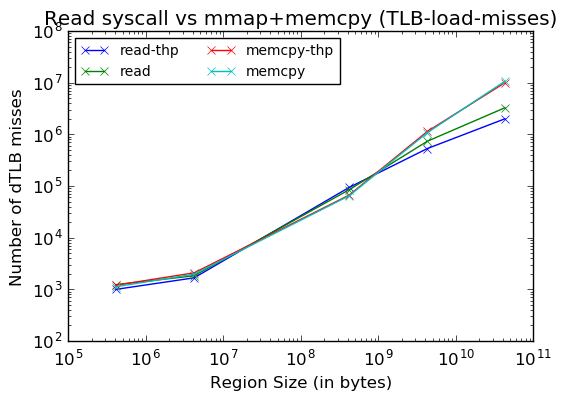

In [136]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_tlb_misses_load[i], '-x', label=labels[i])

plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (TLB-load-misses)')
plt.ylabel('Number of dTLB misses')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(6, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)


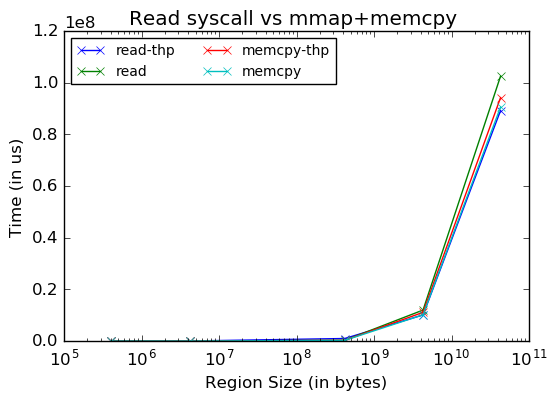

In [137]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_runtimes[i], '-x', label=labels[i])

#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy ')
plt.ylabel('Time (in us)')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(6, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)

In [184]:
print "Results - memcpy vs read"

dir = '/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks/data_30jan_16KB'
%cd $dir
file_list_tlb_misses = ["r.out", "r_nothp.out", "m.out", "m_nothp.out"]
file_list_runtime = ["r1.out", "r1_nothp.out", "m1.out", "m1_nothp.out"]

sizes = [409600, 4194304, 419430400, 4294967296, 42949672960]
ids = ["400K", "4M", "400M", "4G", "40G"]
labels=["read-thp", "read", "memcpy-thp", "memcpy"]
# tlb misses is  [
# for read-thp {400K: [num1, num2], 4M: [..]}
tlb_misses_load = [None]*len(file_list_tlb_misses)
tlb_misses_store = [None]*len(file_list_tlb_misses)
runtimes = [None]*len(file_list_runtime)

i=0
for file in file_list_tlb_misses:
    f=open(file)
    key_ready = False
    tlb_misses_load[i] = {}
    tlb_misses_store[i] = {}
    for row in csv.reader((line.replace('\0','') for line in f), delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Performance' in row[0]:
                key = re.search('file_(.*).dat', row[5]).group(1)
                key_ready = True
                if key not in tlb_misses_load[i]:
                    tlb_misses_load[i][key] = []
                    tlb_misses_store[i][key] = []                    
            if 'dTLB-load-misses' in row[1] and key_ready == True:
                tlb_misses_load[i][key].append(int(row[0].replace(',', '')))
            if 'dTLB-store-misses' in row[1] and key_ready == True:
                key_ready = False
                tlb_misses_store[i][key].append(int(row[0].replace(',', '')))
                
    f.close()
    i=i+1
#print tlb_misses
# Extracting the data in two steps to help
# in case some data is missing

avg_tlb_misses_load = [None]*len(labels)
avg_tlb_misses_store = [None]*len(labels)
for i in xrange(len(labels)):
    avg_tlb_misses_load[i] = []
    avg_tlb_misses_store[i] = []
    for j in xrange(len(sizes)):
        avg_tlb_misses_load[i].append(np.mean(tlb_misses_load[i][ids[j]]))
        avg_tlb_misses_store[i].append(np.mean(tlb_misses_store[i][ids[j]]))
print avg_tlb_misses_load    
print avg_tlb_misses_store    

i=0
for file in file_list_runtime:
    f=open(file)
    key_ready = False
    runtimes[i] = {}
    for row in csv.reader((line.replace('\0','') for line in f), delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Mapped' in row[0]:
                key = re.search('file_(.*).dat', row[2]).group(1)
                key_ready = True
                if key not in runtimes[i]:
                    runtimes[i][key] = []                
            if 'Read/memcpy' in row[0] and key_ready == True:
                key_ready = False
                runtimes[i][key].append(float(row[2]))
    f.close()
    i=i+1
#print runtimes

avg_runtimes = [None]*len(labels)
for i in xrange(len(labels)):
    avg_runtimes[i] = []
    for j in xrange(len(sizes)):
        avg_runtimes[i].append(np.mean(runtimes[i][ids[j]]))
print avg_runtimes    



Results - memcpy vs read
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks/data_30jan_16KB
[[1004.9, 1925.5, 87815.0, 747978.69999999995, 3654170.0], [1124.7, 1964.8, 83294.300000000003, 719978.0, 4937618.0], [949.5, 1994.5999999999999, 62370.400000000001, 1073940.1000000001, 10123392.800000001], [1377.3, 2270.5999999999999, 72491.699999999997, 1122852.3999999999, 9680403.0999999996]]
[[193.69999999999999, 423.60000000000002, 5003.1999999999998, 174137.29999999999, 1139537.3], [213.30000000000001, 450.30000000000001, 3641.5999999999999, 191147.60000000001, 1435914.3999999999], [173.40000000000001, 413.30000000000001, 3689.0999999999999, 170798.79999999999, 1359961.3999999999], [217.69999999999999, 441.89999999999998, 3481.6999999999998, 192240.79999999999, 1303268.3]]
[[1597.432, 10423.342500000002, 248583.2113, 10113486.528200001, 89001977.262699991], [2137.8042000000005, 10128.355599999999, 249379.71729999999, 10221498.202, 89285885.576100007], [1799.0744000000002, 94

[1004.9, 1925.5, 87815.0, 747978.69999999995, 3654170.0]
[1124.7, 1964.8, 83294.300000000003, 719978.0, 4937618.0]
[949.5, 1994.5999999999999, 62370.400000000001, 1073940.1000000001, 10123392.800000001]
[1377.3, 2270.5999999999999, 72491.699999999997, 1122852.3999999999, 9680403.0999999996]


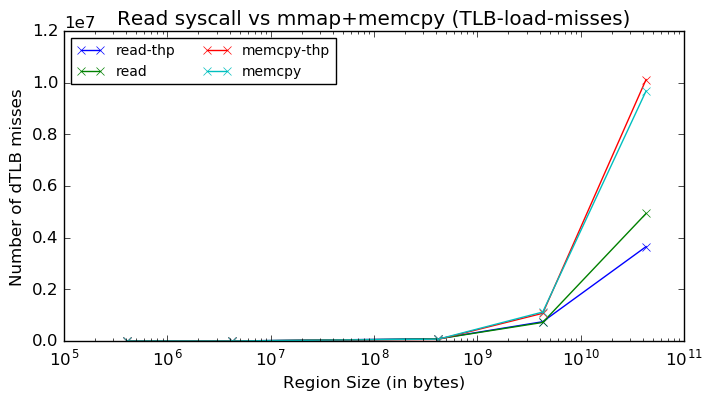

In [185]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_tlb_misses_load[i], '-x', label=labels[i])
    print avg_tlb_misses_load[i]

#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (TLB-load-misses)')
plt.ylabel('Number of dTLB misses')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(8, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)
plt.savefig('tlb-misses-16KB.pdf', format='PDF')

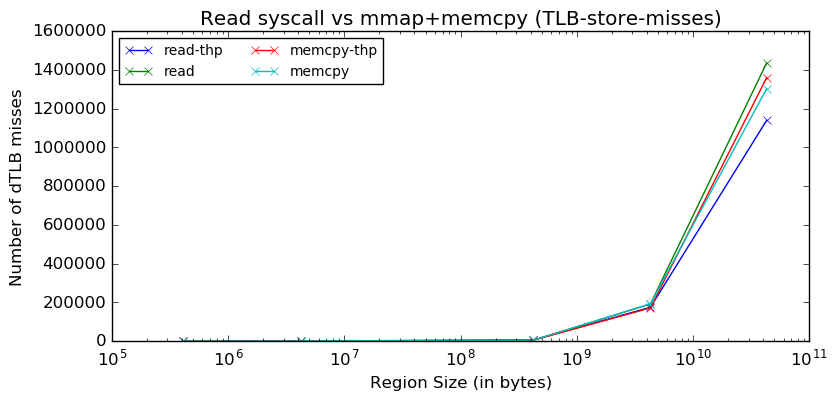

In [192]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_tlb_misses_store[i], '-x', label=labels[i])

#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (TLB-store-misses)')
plt.ylabel('Number of dTLB misses')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(9, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)
plt.savefig('tlb-store-misses-16KB.pdf', format='PDF')

[1597.432, 10423.342500000002, 248583.2113, 10113486.528200001, 89001977.262699991]
[2137.8042000000005, 10128.355599999999, 249379.71729999999, 10221498.202, 89285885.576100007]
[1799.0744000000002, 9440.3019999999997, 254162.28640000001, 10154301.0844, 89237199.034400001]
[1816.7539000000002, 10165.3213, 238512.77919999999, 10293406.733100001, 92097950.886600003]


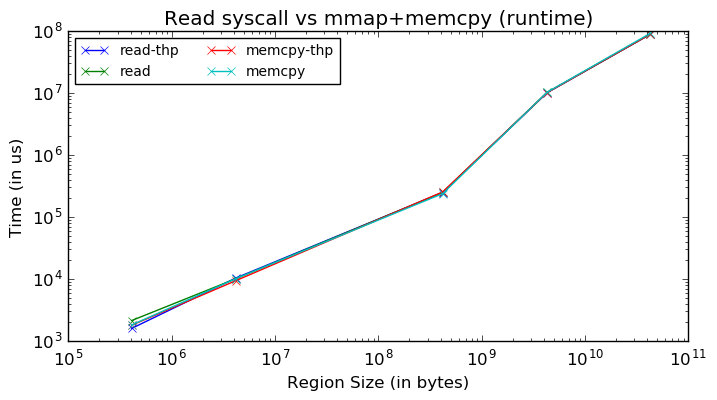

In [187]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_runtimes[i], '-x', label=labels[i])
    print avg_runtimes[i]
plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (runtime)')
plt.ylabel('Time (in us)')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(8, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)
plt.savefig('runtime-16KB.pdf', format='PDF')

Results - memcpy vs read
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks/data_31jan_64KB
r1.out
r1_nothp.out
m1.out
m1_nothp.out
[9839.7181999999993, 280150.09020000004, 10628902.2914, 95139928.526900008]
[9757.1349000000009, 268686.0013, 10571257.315900002, 92900942.125599995]
[9382.3780999999999, 282178.35259999998, 10351965.110999998, 94404142.980700016]
[9289.4230000000007, 270202.63320000004, 10569943.489, 98322598.737499997]


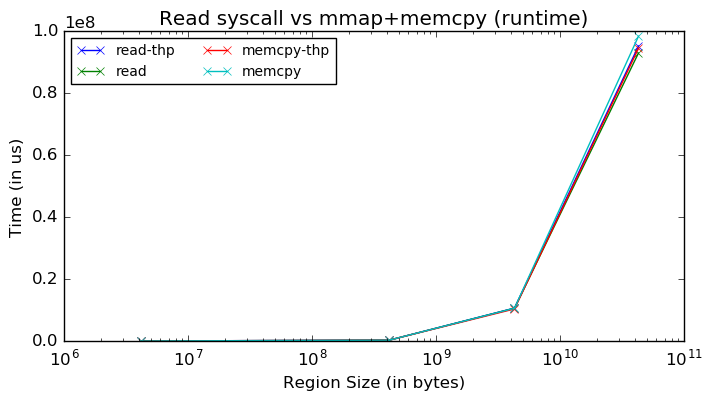

In [161]:
print "Results - memcpy vs read"

dir = '/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks/data_31jan_64KB'
%cd $dir
file_list_tlb_misses = ["r.out", "r_nothp.out", "m.out", "m_nothp.out"]
file_list_runtime = ["r1.out", "r1_nothp.out", "m1.out", "m1_nothp.out"]

sizes = [4194304, 419430400, 4294967296, 42949672960]
ids = ["4M", "400M", "4G", "40G"]
labels=["read-thp", "read", "memcpy-thp", "memcpy"]
# tlb misses is  [
# for read-thp {400K: [num1, num2], 4M: [..]}
tlb_misses_load = [None]*len(file_list_tlb_misses)
tlb_misses_store = [None]*len(file_list_tlb_misses)
runtimes = [None]*len(file_list_runtime)

i=0
for file in file_list_tlb_misses:
    f=open(file)
    key_ready = False
    tlb_misses_load[i] = {}
    tlb_misses_store[i] = {}
    for row in csv.reader((line.replace('\0','') for line in f), delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Performance' in row[0]:
                key = re.search('file_(.*).dat', row[5]).group(1)
                key_ready = True
                if key not in tlb_misses_load[i]:
                    tlb_misses_load[i][key] = []
                    tlb_misses_store[i][key] = []                    
            if 'dTLB-load-misses' in row[1] and key_ready == True:
                tlb_misses_load[i][key].append(int(row[0].replace(',', '')))
            if 'dTLB-store-misses' in row[1] and key_ready == True:
                key_ready = False
                tlb_misses_store[i][key].append(int(row[0].replace(',', '')))
                
    f.close()
    i=i+1
#print tlb_misses
# Extracting the data in two steps to help
# in case some data is missing

avg_tlb_misses_load = [None]*len(labels)
avg_tlb_misses_store = [None]*len(labels)
for i in xrange(len(labels)):
    avg_tlb_misses_load[i] = []
    avg_tlb_misses_store[i] = []
    for j in xrange(len(sizes)):
        avg_tlb_misses_load[i].append(np.mean(tlb_misses_load[i][ids[j]]))
        avg_tlb_misses_store[i].append(np.mean(tlb_misses_store[i][ids[j]]))

i=0
for file in file_list_runtime:
    f=open(file)
    print file
    key_ready = False
    runtimes[i] = {}
    # Replace all null chars before reading in
    for row in csv.reader((line.replace('\0','') for line in f), delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Mapped' in row[0]:
                key = re.search('file_(.*).dat', row[2]).group(1)
                key_ready = True
                if key not in runtimes[i]:
                    runtimes[i][key] = []                
            if 'Read/memcpy' in row[0] and key_ready == True:
                key_ready = False
                runtimes[i][key].append(float(row[2]))
    f.close()
    i=i+1

avg_runtimes = [None]*len(labels)
for i in xrange(len(labels)):
    avg_runtimes[i] = []
    for j in xrange(len(sizes)):
        avg_runtimes[i].append(np.mean(runtimes[i][ids[j]]))

for i in xrange(len((labels))):
    plt.plot(sizes, avg_runtimes[i], '-x', label=labels[i])
    print avg_runtimes[i]
#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (runtime)')
plt.ylabel('Time (in us)')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(8, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)

[2388.5, 88535.800000000003, 949842.30000000005, 4025420.6000000001]
[2525.8000000000002, 87645.100000000006, 859474.90000000002, 3574932.2999999998]
[2298.1999999999998, 46563.900000000001, 977078.30000000005, 7260291.4000000004]
[2639.0, 57134.800000000003, 988783.19999999995, 8044025.2999999998]


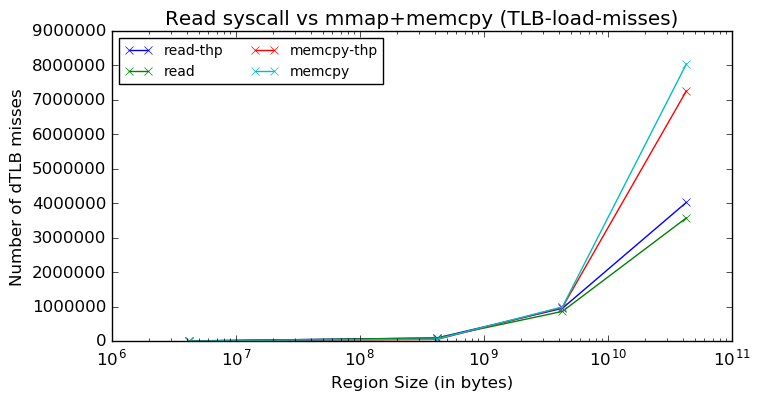

In [162]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_tlb_misses_load[i], '-x', label=labels[i])
    print avg_tlb_misses_load[i]

#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (TLB-load-misses)')
plt.ylabel('Number of dTLB misses')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(8, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)


Results - memcpy vs read
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks/data_31jan_4KB
r1.out
r1_nothp.out
m1.out
m1_nothp.out
[1668.1599999999999, 8919.5443333333333, 328229.14400000003, 10015887.399666665, 87916346.151333332]
[1753.5656666666666, 9078.4310000000005, 325520.49133333337, 10135868.645000001, 87873049.553333327]
[1987.2293333333334, 9247.0116666666672, 253981.40633333335, 10005403.461000001, 90462679.593666673]
[2052.3850000000002, 9340.8570000000018, 257679.18766666666, 10084269.766999999, 90663568.380666673]


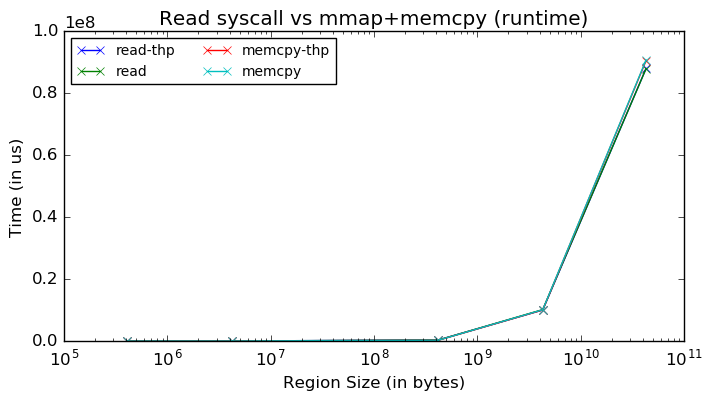

In [176]:
print "Results - memcpy vs read"

dir = '/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks/data_31jan_4KB'
%cd $dir
file_list_tlb_misses = ["r.out", "r_nothp.out", "m.out", "m_nothp.out"]
file_list_runtime = ["r1.out", "r1_nothp.out", "m1.out", "m1_nothp.out"]

sizes = [409600, 4194304, 419430400, 4294967296, 42949672960]
ids = ["400K", "4M", "400M", "4G", "40G"]
labels=["read-thp", "read", "memcpy-thp", "memcpy"]
# tlb misses is  [
# for read-thp {400K: [num1, num2], 4M: [..]}
tlb_misses_load = [None]*len(file_list_tlb_misses)
tlb_misses_store = [None]*len(file_list_tlb_misses)
runtimes = [None]*len(file_list_runtime)

i=0
for file in file_list_tlb_misses:
    f=open(file)
    key_ready = False
    tlb_misses_load[i] = {}
    tlb_misses_store[i] = {}
    for row in csv.reader((line.replace('\0','') for line in f), delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Performance' in row[0]:
                key = re.search('file_(.*).dat', row[5]).group(1)
                key_ready = True
                if key not in tlb_misses_load[i]:
                    tlb_misses_load[i][key] = []
                    tlb_misses_store[i][key] = []                    
            if 'dTLB-load-misses' in row[1] and key_ready == True:
                tlb_misses_load[i][key].append(int(row[0].replace(',', '')))
            if 'dTLB-store-misses' in row[1] and key_ready == True:
                key_ready = False
                tlb_misses_store[i][key].append(int(row[0].replace(',', '')))
                
    f.close()
    i=i+1
#print tlb_misses
# Extracting the data in two steps to help
# in case some data is missing

avg_tlb_misses_load = [None]*len(labels)
avg_tlb_misses_store = [None]*len(labels)
for i in xrange(len(labels)):
    avg_tlb_misses_load[i] = []
    avg_tlb_misses_store[i] = []
    for j in xrange(len(sizes)):
        avg_tlb_misses_load[i].append(np.mean(tlb_misses_load[i][ids[j]]))
        avg_tlb_misses_store[i].append(np.mean(tlb_misses_store[i][ids[j]]))

i=0
for file in file_list_runtime:
    f=open(file)
    print file
    key_ready = False
    runtimes[i] = {}
    # Replace all null chars before reading in
    for row in csv.reader((line.replace('\0','') for line in f), delimiter=' ', skipinitialspace=True):
        if len(row)>1:
            if 'Mapped' in row[0]:
                key = re.search('file_(.*).dat', row[2]).group(1)
                key_ready = True
                if key not in runtimes[i]:
                    runtimes[i][key] = []                
            if 'Read/memcpy' in row[0] and key_ready == True:
                key_ready = False
                runtimes[i][key].append(float(row[2]))
    f.close()
    i=i+1

avg_runtimes = [None]*len(labels)
for i in xrange(len(labels)):
    avg_runtimes[i] = []
    for j in xrange(len(sizes)):
        avg_runtimes[i].append(np.mean(runtimes[i][ids[j]]))

for i in xrange(len((labels))):
    plt.plot(sizes, avg_runtimes[i], '-x', label=labels[i])
    print avg_runtimes[i]
#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (runtime)')
plt.ylabel('Time (in us)')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(8, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)

[1108.0999999999999, 1970.7, 86756.199999999997, 785998.30000000005, 2906604.7999999998]
[1323.0, 2059.0999999999999, 89746.5, 856243.30000000005, 3296943.6000000001]
[1252.7, 2097.6999999999998, 54511.900000000001, 910424.30000000005, 8623253.9000000004]
[1309.5, 2434.5999999999999, 65959.100000000006, 890606.30000000005, 8254827.2999999998]


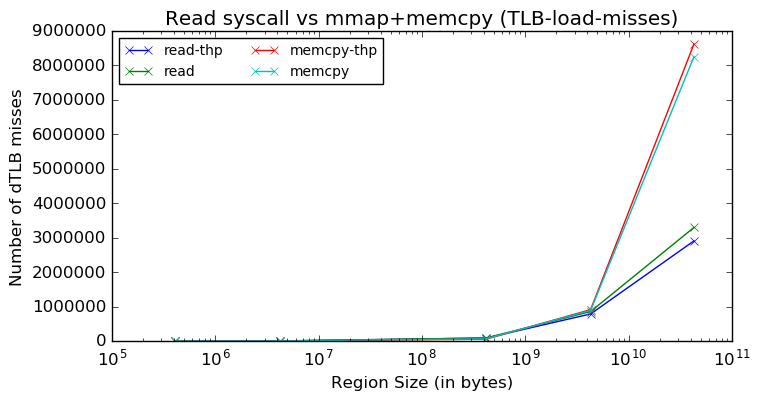

In [168]:
for i in xrange(len((labels))):
    plt.plot(sizes, avg_tlb_misses_load[i], '-x', label=labels[i])
    print avg_tlb_misses_load[i]

#plt.yscale('log')
plt.xscale('log')
#plt.xlim(10, 10000000)
#plt.ylim(100, 400000)
plt.title('Read syscall vs mmap+memcpy (TLB-load-misses)')
plt.ylabel('Number of dTLB misses')
plt.xlabel('Region Size (in bytes)')
fig = plt.gcf()
fig.set_size_inches(8, 4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=2, fontsize=10)
